# Predicting df Card Defaults 

**Introduction**

df One has seen an increase in the number of customers who have defaulted on loans they have secured from various partners, and df One, as their df scoring service, could risk losing business if the problem is not solved right away. In this df_payification task  “df_pay” is the dependent variable. 

For this task below is the problem statement and investigative question that needs to be addressed:

**Problem:**
1.	Increase in customer default rates - This is bad for df One since we approve the customers for loans in the first place.
2.	Revenue and customer loss for clients and, eventually, loss of clients for dfOne

**Investigative Question:**
1.	How do you ensure that customers can/will pay their loans? Can we do this?
2.	Can we approve customers with high certainty?


In [1]:
# Importing Libraraies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data
df = pd.read_excel('default_of_credit_card_clients_0.xlsx')

**Understanding Data**

Case of customers default payments in Taiwan. Data collected from April to September, 2005)

**Variables in Data (Total 23 variables)**
1. Binary Response variable, default payment (Yes = 1, No = 0)
2. LIMIT_BAL: Amount of the given df (NT dollarGender (1 = male; 2 = female).
3. Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
4. Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
5. Age (year).
6. PAY_X: History of past payment.( April to September 2015 - 6 months)
7. BILL_AMTX: Amount of bill statement (NT dollar. April to September 2015 - 6 months. 
8. PAY_AMTX: Amount of previous payment (NT dollar. April to September 2015 - 6 months.

Imbalance in the df_pay – Dataset   shows that 6636 out of 30000 customers will default next month. 
Dataset is highly imbalanced.


In [3]:
# Checking data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Column names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
# Understand the makeup of the data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# Checking the data types of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## Pre-processing

### 1) Checking for missing data

In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [8]:
df.isnull().sum()
print('There are no missing values in:'  'df card dataset')

There are no missing values in:df card dataset


###  Renaming Variables 

In [9]:
# Renaming 'df_pay' and Pay_0 columns
df.rename(columns = {'default payment next month':'df_pay'}, inplace = True) # renaming dependent variable
df.rename(columns={"PAY_0": "PAY_1"}, inplace = True) # renaming Pay_0 to Pay_1

In [10]:
# Column names - Confirming renamng of columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'df_pay'],
      dtype='object')

###  Removing ID column

In [11]:
# Dropping ID column
df.drop('ID', axis = 1, inplace =True) 
df.columns # Confirming removal of ID column

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'df_pay'],
      dtype='object')

###  Grouping Eduction Categories

In [12]:
# Checking Education variable unique levels
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [13]:
# Grouping "others" and "unindentified" levels 
df['EDUCATION']=np.where(df['EDUCATION'] == 5, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 6, 4, df['EDUCATION'])
df['EDUCATION']=np.where(df['EDUCATION'] == 0, 4, df['EDUCATION'])

In [14]:
# Confirming grouping 
df['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

## Exploratory Data Analysis (EDA)

### 1) df limit distribution

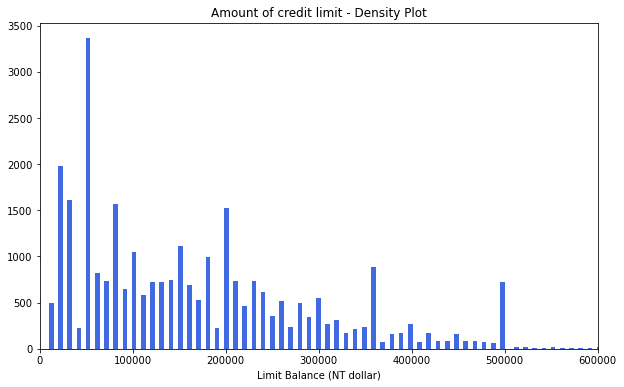

<Figure size 432x288 with 0 Axes>

In [15]:
# Frequencey distribution of amount of credit limit
plt.figure(figsize = (10,6))
plt.title('Amount of credit limit - Density Plot')
plt.xlim([0,600000])
plt.xlabel('Limit Balance (NT dollar)')
plt.hist(df['LIMIT_BAL'], bins=200, color=['royalblue'])
plt.show()
plt.savefig('Amount of credit limit.png', dpi=200, transparent=True)

**$50000 is the credit limit common for larget number of people.**

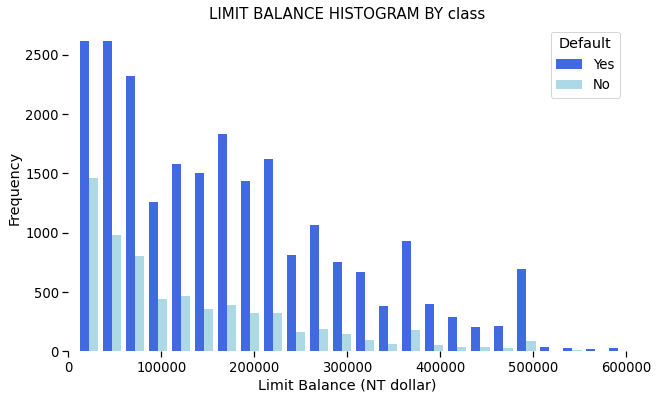

In [16]:
#Frequencey distribution of amount of df limit based on "class"

df_pay0 = list(df[df['df_pay'] == 0]['LIMIT_BAL'])
df_pay1 = list(df[df['df_pay'] == 1]['LIMIT_BAL'])

plt.figure(figsize=(10,6))
sns.set_context('notebook', font_scale=1.2)
plt.hist([df_pay0, df_pay1], bins = 40, color=['royalblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY class', SIZE=15)
plt.box(False)
plt.savefig('LIMIT BALANCE HISTOGRAM BY class.png', dpi=200, transparent=True)

**Overall most df card defaults are by clients with df limit balance upto $100,000.**

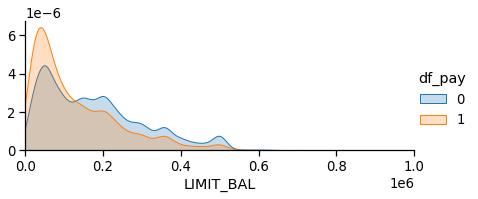

In [17]:
# df limit balance distribution based on df_pay 
fig = sns.FacetGrid(df, hue='df_pay', aspect = 2)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = df['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()
fig.savefig('img1.jpg', dpi=200, bbox ='tight')

**Potential defaulters show higher frequency of lower limit of amount of df limit.**

### 2) Frequency distribution of Age

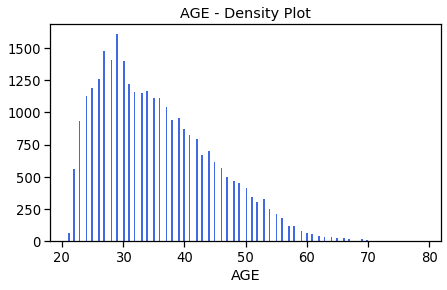

<Figure size 432x288 with 0 Axes>

In [18]:
# Frequency distribution of age whole dataset
plt.figure(figsize = (7,4))
plt.title('AGE - Density Plot')
plt.xlabel('AGE')
plt.hist(df['AGE'], bins=200, color=['royalblue'])
plt.show()
plt.savefig('AGE Density Plot.png', dpi=200, transparent=True)

**Higher density of people found in age group 25 to 40. With highest density around 30 years old.**

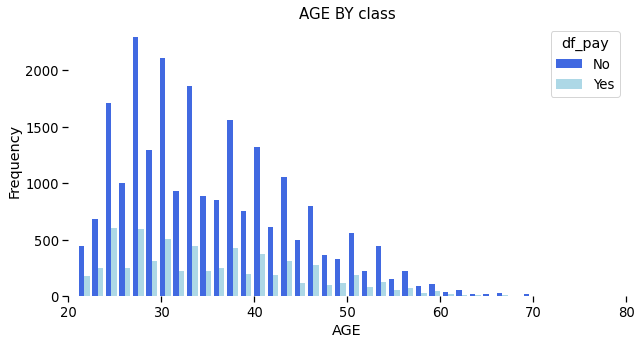

In [19]:
# Frequency distribution of age by "credit"

df_pay_0 = list(df[df['df_pay'] == 0]['AGE'])
df_pay_1 = list(df[df['df_pay'] == 1]['AGE'])

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1.2)
plt.hist([df_pay_0, df_pay_1], bins = 40, color=['royalblue', 'lightblue'])
plt.xlim([20,80])
plt.legend(['No', 'Yes'], title = 'df_pay', loc='upper right', facecolor='white')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title('AGE BY class', SIZE=15)
plt.box(False)
plt.savefig('AGE BY class.png', dpi=200, transparent=True);


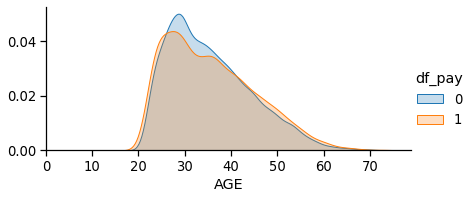

In [20]:
# Age distribution based on df_pay 
fig = sns.FacetGrid(df, hue='df_pay', aspect = 2)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()
fig.savefig('AGE BY class_kde.jpg', dpi=200, transparent=True);


**Higher proportion of non - defaulters in 25 to 40 years of age group.** 

### 3) Distribution of default df card clients 

In [21]:
# Getting count of defaulters vs. non-defaulters
df['df_pay'].value_counts()

0    23364
1     6636
Name: df_pay, dtype: int64

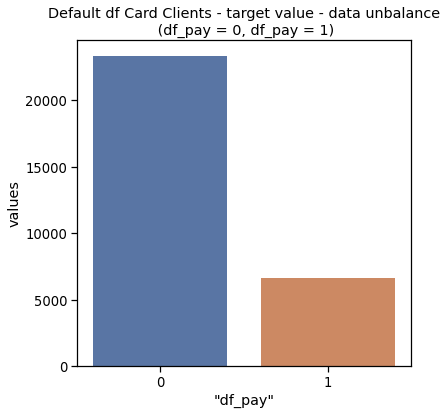

In [22]:
# df_pay 0 (non defaulters) vs. df_pay 1 (defaulters)
default = df["df_pay"].value_counts()
df_1 = (pd.DataFrame({'"df_pay"': default.index,'values': default.values}))
plt.figure(figsize = (6,6))
plt.title('Default df Card Clients - target value - data unbalance\n (df_pay = 0, df_pay = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = '"df_pay"', y="values", data=df_1 , palette="deep")
locs, labels = plt.xticks()
plt.show()

**6636 people out of 30000 people will default next month.**

### 4) Gender

In [23]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,df_pay
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [24]:
# Male vs. female counts
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

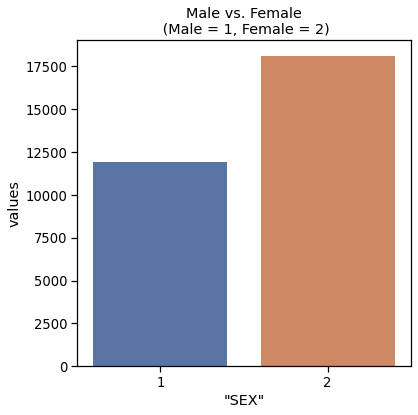

In [25]:
# Male vs. female count 
temp = df["SEX"].value_counts()
df_2 = (pd.DataFrame({'"SEX"': temp.index,'values': temp.values}))
plt.figure(figsize = (6,6))
plt.title('Male vs. Female\n (Male = 1, Female = 2)')
sns.set_color_codes("pastel")
sns.barplot(x = '"SEX"', y="values", data=df_2, palette="deep")
locs, labels = plt.xticks()
plt.show()

**Higher proportion of female as compared to males.**

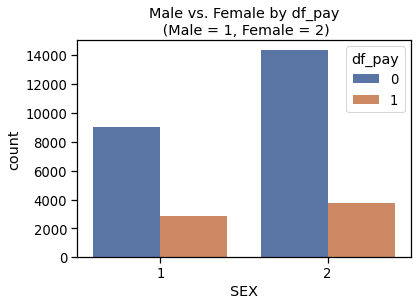

In [26]:
# Male vs. Female distribution based on "df_pay 0 vs 1"
sns.countplot(x='SEX', data=df, hue="df_pay" , palette="deep")
plt.title('Male vs. Female by df_pay\n (Male = 1, Female = 2)')
plt.show()

**In both df_payes (non defaulters and defaulters) proportion of females is more than males.**

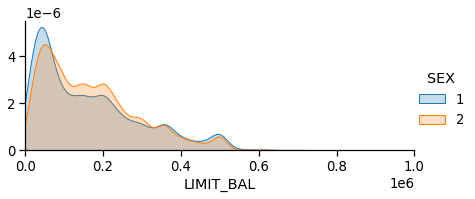

In [27]:
# Balance limit based on Gender
fig = sns.FacetGrid(df, hue='SEX', aspect = 2)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
oldest = df['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

**Higher proportion of males with lower df limit balance.**

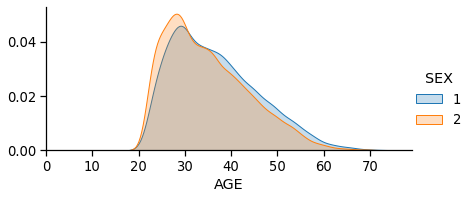

In [28]:
# Age distribution based on Gender 
fig = sns.FacetGrid(df, hue='SEX', aspect = 2)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

**Higher proportion of females in age range 20 to 40.**

### 5) Education 

In [29]:
# Total count in each eduacation level
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

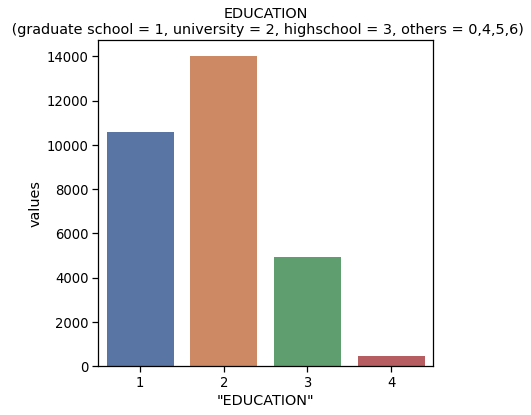

In [30]:
# Distribution of people by education level
temp = df["EDUCATION"].value_counts()
df_3 = (pd.DataFrame({'"EDUCATION"': temp.index,'values': temp.values}))
plt.figure(figsize = (6,6))
plt.title('EDUCATION\n (graduate school = 1, university = 2, highschool = 3, others = 0,4,5,6)')
sns.set_color_codes("pastel")
sns.barplot(x = '"EDUCATION"', y="values", data=df_3 , palette="deep")
locs, labels = plt.xticks()
plt.show()

**Highest proportion of people with university and graduate school education**

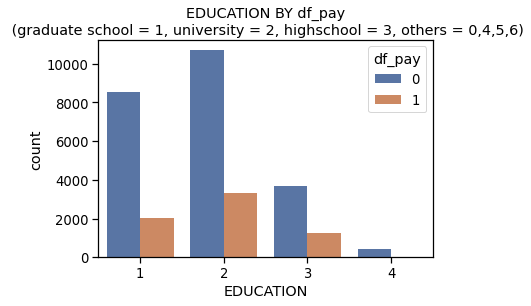

In [31]:
# Distribution of people by education level based on "df_pay 0 vs. 1"
sns.countplot(x='EDUCATION', data=df, hue="df_pay" , palette="deep")
plt.title('EDUCATION BY df_pay\n (graduate school = 1, university = 2, highschool = 3, others = 0,4,5,6)')
plt.show()

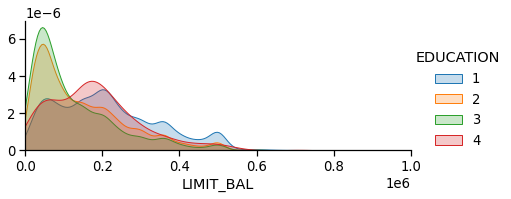

In [32]:
# Balance limit based on Education Level
fig = sns.FacetGrid(df, hue='EDUCATION', aspect = 2)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
oldest = df['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

**Higher proportion of non-defaulters and defaulters with university and graduate level education.**

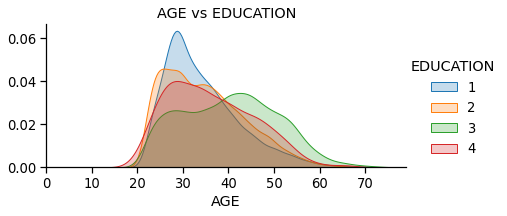

In [60]:
# Age distribution based on Education
fig = sns.FacetGrid(df, hue='EDUCATION', aspect = 2)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = df['AGE'].max()
fig.set(xlim=(0,oldest))
plt.title("AGE vs EDUCATION")
fig.add_legend()
plt.show()
fig.savefig("AGE_EDUCATION.jpg",bbox_inches = "tight")

**Higher proportion of people with graduate and university level in age group 20 to 40. While high school and other levels show lower proportion.**

### 6) Marital Status

In [34]:
# Total count in each marital status
df['MARRIAGE'].value_counts(dropna=False)

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

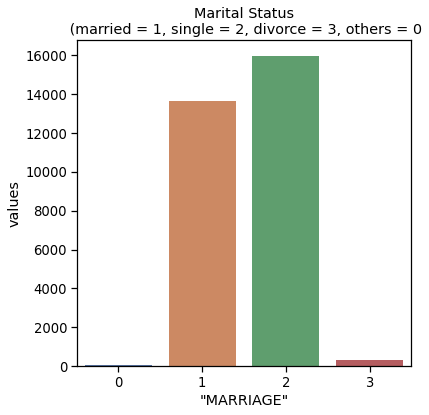

In [35]:
# Distribution of people by marital status level
temp = df["MARRIAGE"].value_counts()
df_4 = (pd.DataFrame({'"MARRIAGE"': temp.index,'values': temp.values}))
plt.figure(figsize = (6,6))
plt.title('Marital Status\n (married = 1, single = 2, divorce = 3, others = 0')
sns.set_color_codes("pastel")
sns.barplot(x = '"MARRIAGE"', y="values", data=df_4 , palette="deep")
locs, labels = plt.xticks()
plt.show()

**Higher proportion of people either married or single. Futher proportion of singles is more than married**

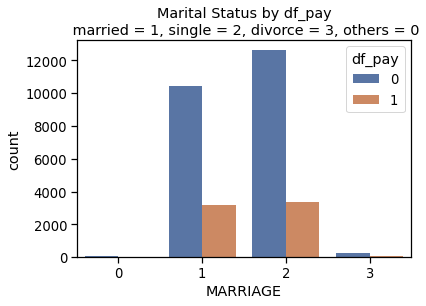

In [36]:
# Distribution of people by marital status level based on "df_pay 0 vs. 1"
sns.countplot(x='MARRIAGE', data=df, hue="df_pay" , palette="deep" )
plt.title('Marital Status by df_pay\n married = 1, single = 2, divorce = 3, others = 0')
plt.show()

**For non-defaulters - singles and married in higher proportion. But in case of defaulters both singles and married show almost similar proportion.**

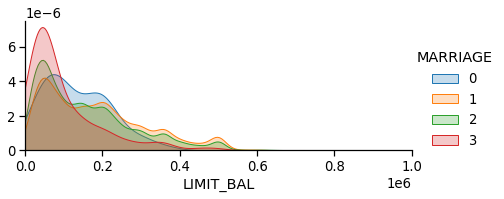

In [37]:
# Balance limit based on Marital Status
fig = sns.FacetGrid(df, hue='MARRIAGE', aspect = 2)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
oldest = df['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

**Higher proportion of people with divorced marital status show lower df limit. While other statues show similar proportion.**

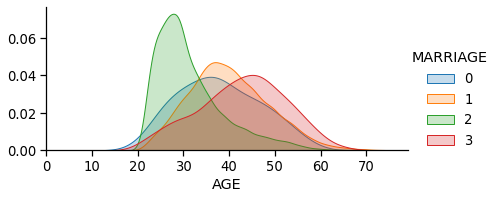

In [38]:
# Age distribution based on Marital Status 
fig = sns.FacetGrid(df, hue = 'MARRIAGE', aspect = 2)
fig.map(sns.kdeplot, 'AGE', shade = True)
oldest = df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

**Highest proportion of singles in age group 20 to 40.**

### Summary of Payment History

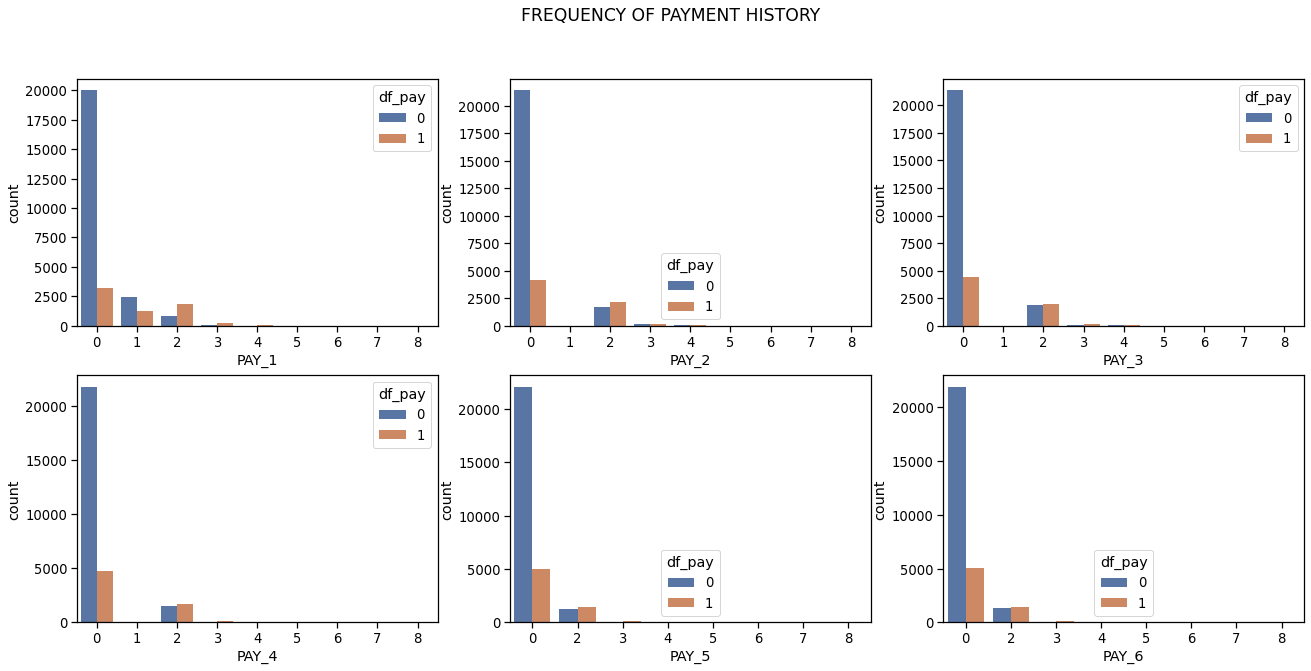

In [39]:
# Creating a new dataframe with categorical variables
subset1 = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'df_pay']]

f, axes = plt.subplots(2, 3, figsize=(22, 10), facecolor='white')
f.suptitle('FREQUENCY OF PAYMENT HISTORY')
ax1 = sns.countplot(x="PAY_1", hue="df_pay", data=subset1, palette="deep", ax=axes[0,0])
ax2 = sns.countplot(x="PAY_2", hue="df_pay", data=subset1, palette="deep", ax=axes[0,1])
ax3 = sns.countplot(x="PAY_3", hue="df_pay", data=subset1, palette="deep", ax=axes[0,2])
ax4 = sns.countplot(x="PAY_4", hue="df_pay", data=subset1, palette="deep", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_5", hue="df_pay", data=subset1, palette="deep", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_6", hue="df_pay", data=subset1, palette="deep", ax=axes[1,2]);
# History of past payment. 
# -2: No consumption; -1: Paid in full; 0: The use of revolving df; 1 = payment delay for one month; 
# 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.


**In all cases - people used revolving df (category 0) followed by paid on on time (category -1) and no consumption (category -2). This implies that people who make payments regularly or ahead of time are likely not to default next month.**

### Summary of Bill Amount

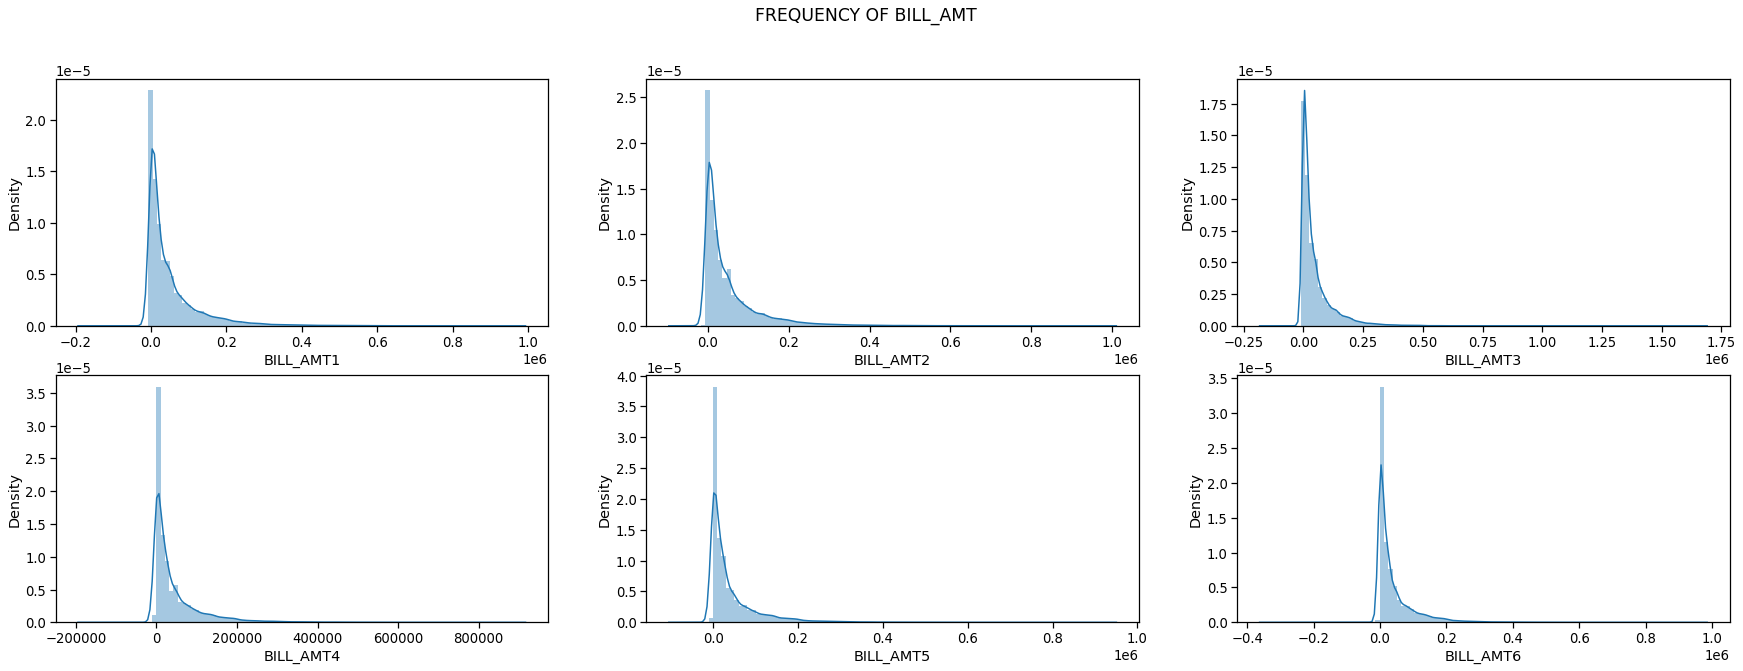

In [40]:
# Frequency of Bill Amount
f, axes = plt.subplots(2, 3, figsize=(30, 10), facecolor='white')
f.suptitle('FREQUENCY OF BILL_AMT')
ax1 = sns.distplot(df["BILL_AMT1"] , bins = 100 , ax=axes[0,0])
ax2 = sns.distplot(df["BILL_AMT2"] , bins = 100 , ax=axes[0,1])
ax3 = sns.distplot(df["BILL_AMT3"] , bins = 100 , ax=axes[0,2])
ax4 = sns.distplot(df["BILL_AMT4"] , bins = 100 , ax=axes[1,0])
ax5 = sns.distplot(df["BILL_AMT5"] , bins = 100 , ax=axes[1,1])
ax6 = sns.distplot(df["BILL_AMT6"] , bins = 100 , ax=axes[1,2])
# Amount of bill statement (NT dollar)

**Maximum people found in billing amount ranging from 0 to $100,000.**

### Summary of Payment Amount

(0.0, 50000.0)

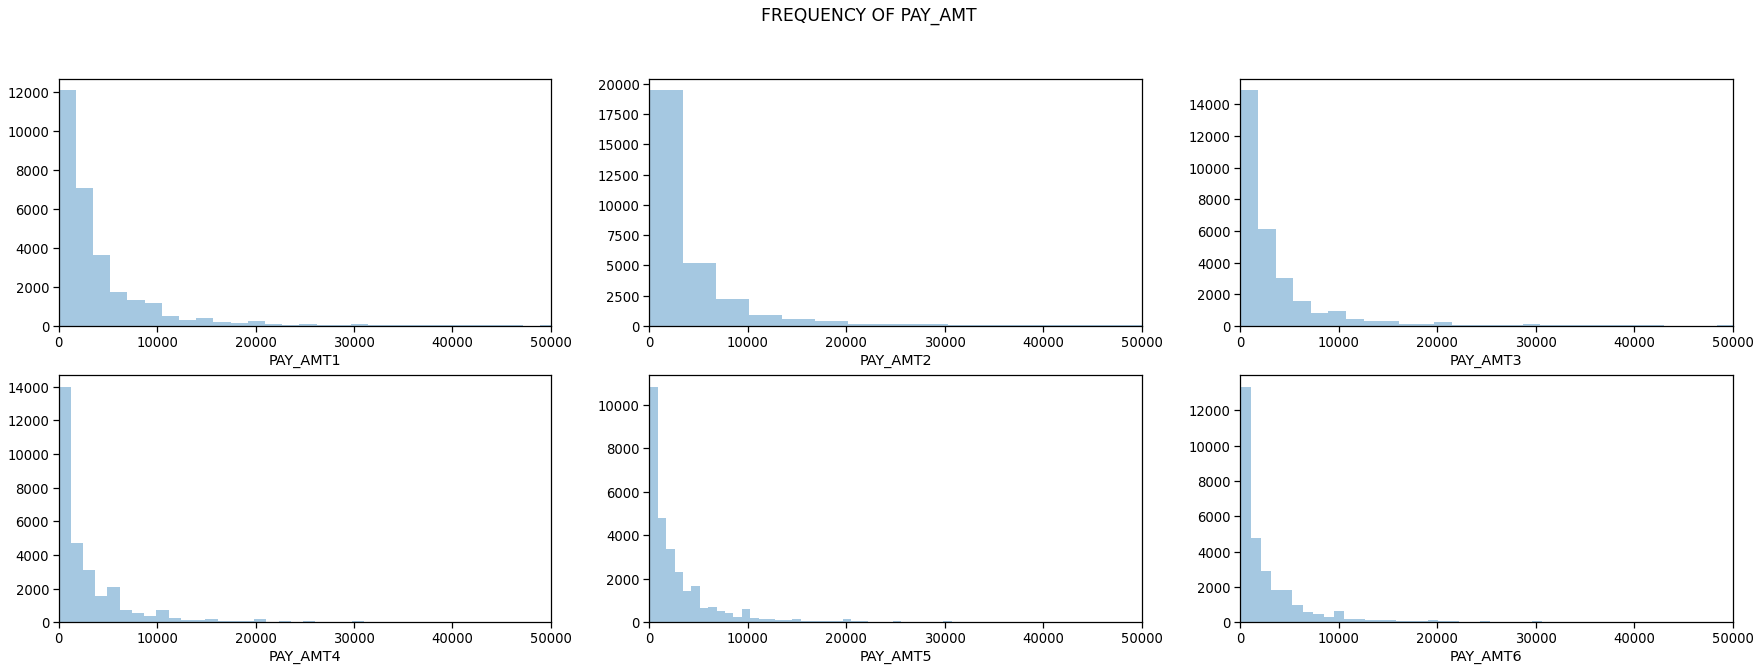

In [41]:
# Frequency of Payment Amount
f, axes = plt.subplots(2, 3, figsize=(30 , 10) , facecolor='white')
f.suptitle('FREQUENCY OF PAY_AMT')
ax1 = sns.distplot(df["PAY_AMT1"] , bins = 500 , ax=axes[0,0] , kde = False)
ax1.set_xlim([0, 50000])
ax2 = sns.distplot(df["PAY_AMT2"] , bins = 500 , ax=axes[0,1] , kde = False)
ax2.set_xlim([0, 50000])
ax3 = sns.distplot(df["PAY_AMT3"] , bins = 500 , ax=axes[0,2] , kde = False)
ax3.set_xlim([0, 50000])
ax4 = sns.distplot(df["PAY_AMT4"] , bins = 500 , ax=axes[1,0] , kde = False)
ax4.set_xlim([0, 50000])
ax5 = sns.distplot(df["PAY_AMT5"] , bins = 500 , ax=axes[1,1] , kde = False)
ax5.set_xlim([0, 50000])
ax6 = sns.distplot(df["PAY_AMT6"] , bins = 500 , ax=axes[1,2] , kde = False)
ax6.set_xlim([0, 50000])
# Amount of previous payment (NT dollar)

**Per billing amount maximum number of people paid perious payments ranging between 0 to $10000 in all cases.**

### Understanding Distribution of data and boxplots to find any outliers

### 1) Gender

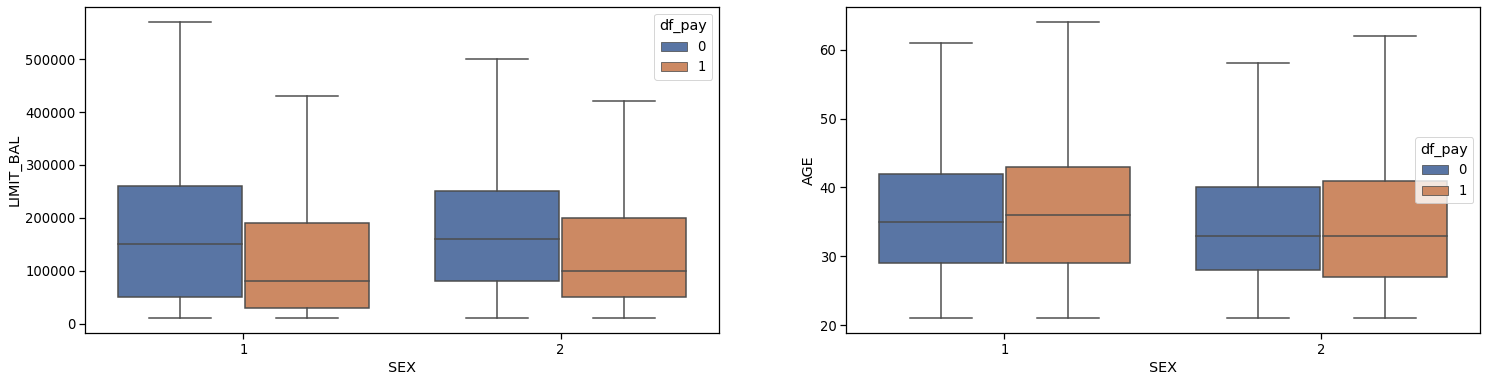

In [42]:
# Boxplot - Limit Balance vs. Sex
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="df_pay",data=df, palette="deep",showfliers=False)
s = sns.boxplot(ax = ax2, x="SEX", y="AGE", hue="df_pay",data=df, palette="deep",showfliers=False)
plt.show();
# showfliers : bool, optional (True) Show the outliers beyond the caps.

**For both df limit and age non-defaulters have similar distribution of males and females. While in case of defaulters, median df limit is lower than non-defaulters but shows median age similar to non-defaulters.**

### 2) Education

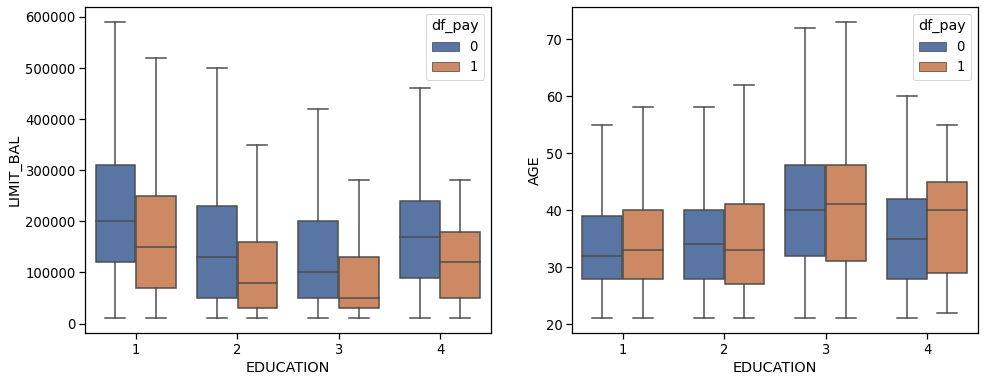

In [43]:
# Boxplot - Limit Balance vs. Education
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))
s = sns.boxplot(ax = ax1, x="EDUCATION", y="LIMIT_BAL", hue="df_pay",data=df, palette="deep",showfliers=False)
s = sns.boxplot(ax = ax2, x="EDUCATION", y="AGE", hue="df_pay",data=df, palette="deep",showfliers=False)
plt.show();

**Non-defaulters (df_pay 0) highest median df limit for education level 1 - graduate and lowest for education level 3 - high school. Overall non-defaulters show higher df limit than defaulters (df_pay 1). While in case of age non-defaulters show slightly less age range as compared to defaulters. Median age is found to be highest in education level 3 - high school.**

### 2) Marriage

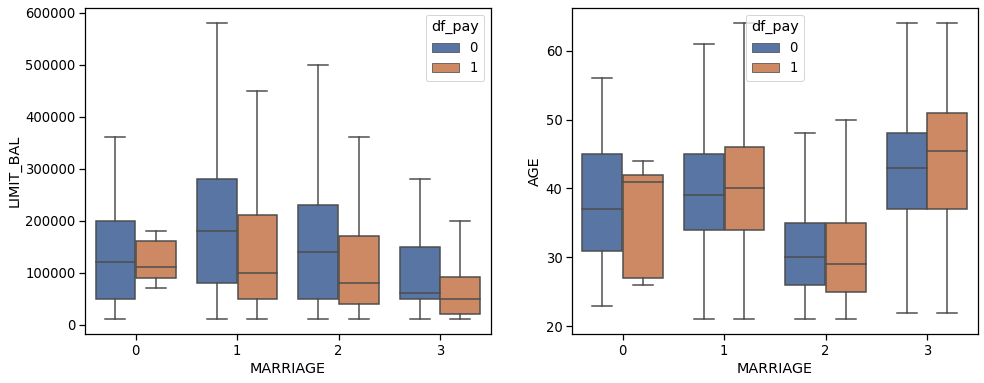

In [44]:
# Boxplot - Limit Balance vs. Marriage
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16,6))
s = sns.boxplot(ax = ax1, x="MARRIAGE", y="LIMIT_BAL", hue="df_pay",data=df, palette="deep",showfliers=False)
s = sns.boxplot(ax = ax2, x="MARRIAGE", y="AGE", hue="df_pay",data=df, palette="deep",showfliers=False)
plt.show();

**Married people (marital status - 1) show highest median df limit while divorced people show least. Singles (martital status - 2) shows lowest median age for both df_payes while divorced (martial status - 3) show highest median age in both df_payes.**

## Conclusions from EDA:

1.	Potential defaulters show higher frequency of lower limit of amount of df limit.
2.	Non –defaulters show higher proportion in 25 to 40 years of age group.
3.	Non-defaulters have high proportion of females.
4.	Non-defaulters - singles and married in higher proportion.
5.	Non-defaulters have higher level of education (1 – graduate or 2 – university)
6.	People who had history of paying previous payments ahead of time are less likely to default next month.  

## Correlation

In [45]:
# Checking correlation between dependent and independent variables
corrMat = df.corr()
print(corrMat)

           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_1  \
LIMIT_BAL   1.000000  0.024755  -0.231088 -0.108139  0.144713 -0.170745   
SEX         0.024755  1.000000   0.013627 -0.031389 -0.090874 -0.034475   
EDUCATION  -0.231088  0.013627   1.000000 -0.149134  0.182434  0.055937   
MARRIAGE   -0.108139 -0.031389  -0.149134  1.000000 -0.414170 -0.011724   
AGE         0.144713 -0.090874   0.182434 -0.414170  1.000000 -0.001447   
PAY_1      -0.170745 -0.034475   0.055937 -0.011724 -0.001447  1.000000   
PAY_2      -0.197136 -0.044750   0.062739 -0.009915 -0.008774  0.698389   
PAY_3      -0.191323 -0.041227   0.053058  0.000717 -0.014266  0.516970   
PAY_4      -0.180629 -0.039737   0.051209 -0.004039 -0.007288  0.460224   
PAY_5      -0.170045 -0.038533   0.039623 -0.002772 -0.013277  0.424473   
PAY_6      -0.167820 -0.032061   0.028670  0.002050 -0.016948  0.373805   
BILL_AMT1   0.285430 -0.033642   0.016597 -0.023472  0.056239 -0.000819   
BILL_AMT2   0.278314 -0.0

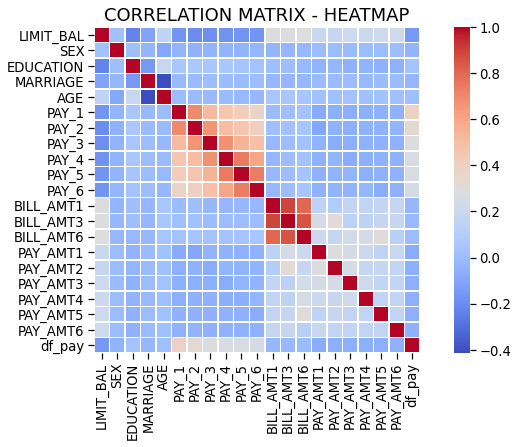

In [56]:
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);
plt.savefig("CORRELATION MATRIX - HEATMAP.jpg",bbox_inches = "tight")


**The heatmat shows positively correlated features (collinearity), such us PAY_1,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6.**

**Data that is uncorrelated is more usefull since such data is discriminatory.**

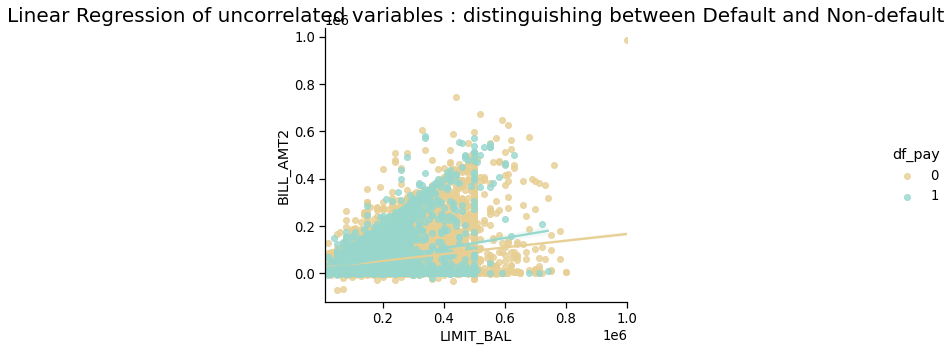

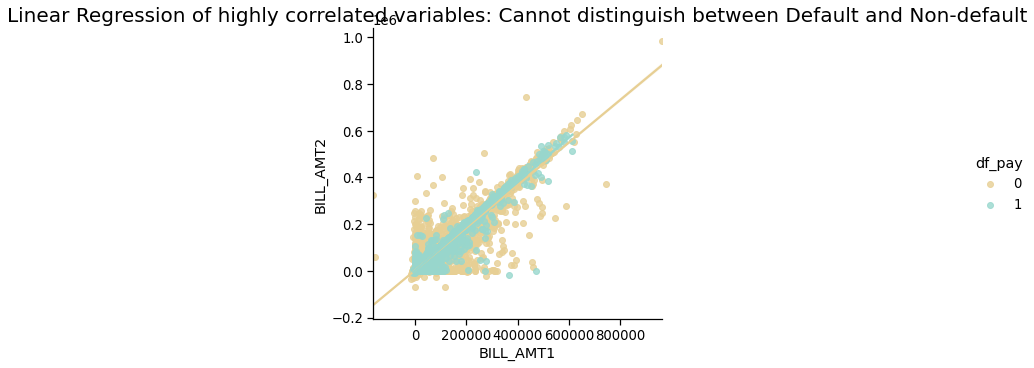

In [47]:
sns.lmplot(x='LIMIT_BAL', y= 'BILL_AMT2', data = df, hue ='df_pay', 
           palette='BrBG')
plt.title('Linear Regression of uncorrelated variables : distinguishing between Default and Non-default', size=20)


sns.lmplot(x='BILL_AMT1', y= 'BILL_AMT2', data = df, hue ='df_pay', 
           palette='BrBG')
plt.title('Linear Regression of highly correlated variables: Cannot distinguish between Default and Non-default', size=20);

#### Collinerity - Previous Payment Amount

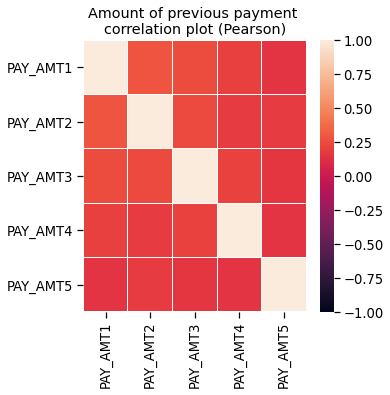

In [48]:
var_PAY_AMT = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (5,5))
plt.title('Amount of previous payment \ncorrelation plot (Pearson)')
corr = df[var_PAY_AMT].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

**No significant correlation is observed for previous payment amount.**

In [49]:
# Checking collinearity between previous payment history
dfCollinearity_pay_amt= df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
PAY_AMT_Coll = dfCollinearity_pay_amt.corr()
print(PAY_AMT_Coll)

          PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6
PAY_AMT1  1.000000  0.285576  0.252191  0.199558  0.148459  0.185735
PAY_AMT2  0.285576  1.000000  0.244770  0.180107  0.180908  0.157634
PAY_AMT3  0.252191  0.244770  1.000000  0.216325  0.159214  0.162740
PAY_AMT4  0.199558  0.180107  0.216325  1.000000  0.151830  0.157834
PAY_AMT5  0.148459  0.180908  0.159214  0.151830  1.000000  0.154896
PAY_AMT6  0.185735  0.157634  0.162740  0.157834  0.154896  1.000000


**No correlations with greater than 0.9 were observed.**

#### Collinearity - Billing Amount

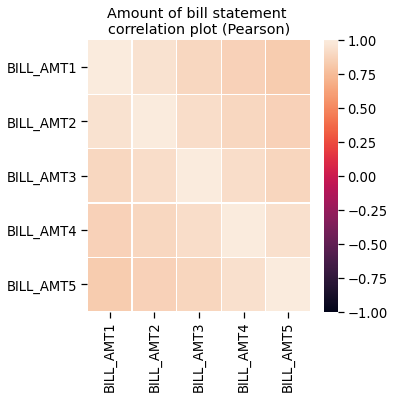

In [50]:
# Checking for collinearity in Bill Amount variables
var_BILL_AMT = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5']
plt.figure(figsize = (5,5))
plt.title('Amount of bill statement \ncorrelation plot (Pearson)')
corr = df[var_BILL_AMT].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

**Decreasing correlation from month to month and lowest correlation between month of April and September.**

In [51]:
# Checking collinearity between bill amounts for all months
dfCollinearity = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
# Checking Collinearity
BILL_AMT_Coll = dfCollinearity.corr()
print(BILL_AMT_Coll)

           BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6
BILL_AMT1   1.000000   0.951484   0.892279   0.860272   0.829779   0.802650
BILL_AMT2   0.951484   1.000000   0.928326   0.892482   0.859778   0.831594
BILL_AMT3   0.892279   0.928326   1.000000   0.923969   0.883910   0.853320
BILL_AMT4   0.860272   0.892482   0.923969   1.000000   0.940134   0.900941
BILL_AMT5   0.829779   0.859778   0.883910   0.940134   1.000000   0.946197
BILL_AMT6   0.802650   0.831594   0.853320   0.900941   0.946197   1.000000


**After confirming billing amount collinearity BILL_AMT (2/4/5) were removed from dataset.**

In [52]:
# Removing variables with high collinearily
df = df.drop(['BILL_AMT2'], axis=1)
df = df.drop(['BILL_AMT4'], axis=1)
df = df.drop(['BILL_AMT5'], axis=1)

In [53]:
# Confirming removal of variables with high collinearity
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT3',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'df_pay'],
      dtype='object')

#### Collinearity - Previous Payment History

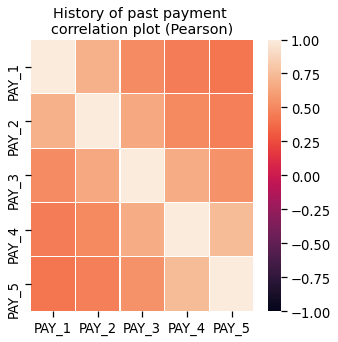

In [54]:
var_PAY = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']

plt.figure(figsize = (5,5))
plt.title('History of past payment \ncorrelation plot (Pearson)')
corr = df[var_PAY].corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

**Previous payments show decresing correlation with increasing months. Least correlation observed for April-September.**

In [55]:
# Checking collinearity between previous payment history
dfCollinearity_pay= df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
PAY_Coll = dfCollinearity_pay.corr()
print(PAY_Coll)

          PAY_1     PAY_2     PAY_3     PAY_4     PAY_5     PAY_6
PAY_1  1.000000  0.698389  0.516970  0.460224  0.424473  0.373805
PAY_2  0.698389  1.000000  0.663529  0.512773  0.462717  0.407086
PAY_3  0.516970  0.663529  1.000000  0.678931  0.551430  0.492827
PAY_4  0.460224  0.512773  0.678931  1.000000  0.745419  0.602875
PAY_5  0.424473  0.462717  0.551430  0.745419  1.000000  0.740357
PAY_6  0.373805  0.407086  0.492827  0.602875  0.740357  1.000000


**No correlations with greater than 0.9 were observed.**

In [62]:
df.to_csv('df_Mod.csv')

## END